In [83]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = {'Score': [-0.8], 'Magnitude': [0.001]}
data = pd.DataFrame(data=data)

data


,Score,Magnitude
0,-0.8,0.001


(-1, 1)

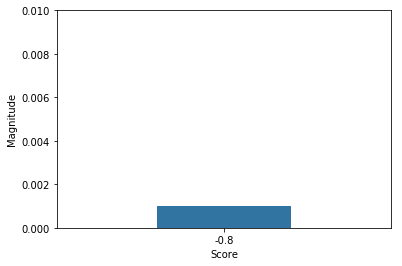

In [72]:
sns.barplot(x = 'Score', y = 'Magnitude', data = data)
plt.ylim(0, 0.01)
plt.xlim(-1, 1)


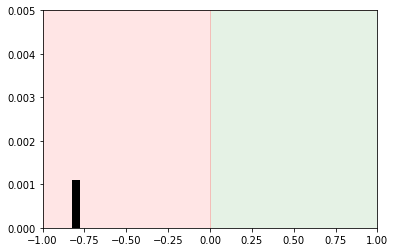

In [110]:
import pylab

# draw vertical line from (70,100) to (70, 250)
ymax = 0.005
plt.subplot(111)
plt.plot([data['Score'], data['Score']], [0, data['Magnitude']], 'k-', lw=8)
plt.ylim(0, ymax)
plt.xlim(-1, 1)

plt.fill([-1,0,0,-1], [0,0,ymax,ymax], 'r', alpha=0.1, edgecolor='r')
plt.fill([1,0,0,1], [0,0,ymax,ymax], 'g', alpha=0.1, edgecolor='r')
#ax.patch.set_visible(False)

#ax.axes.get_yaxis().set_visible(False)
#ur_axes = plot.gca()
#cur_axes.axes.get_yaxis().set_visible(False)


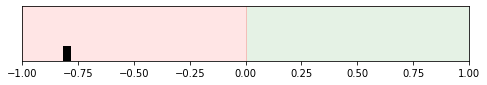

In [122]:
import pylab

ymax = 0.005
fig, ax = plt.subplots(figsize = (8,1))
ax.plot([data['Score'], data['Score']], [0, data['Magnitude']], 'k-', lw=8)
ax.set_ylim([0, ymax])
ax.set_xlim([-1, 1])

ax.yaxis.set_visible(False)

plt.fill([-1,0,0,-1], [0,0,ymax,ymax], 'r', alpha=0.1, edgecolor='r')
plt.fill([1,0,0,1], [0,0,ymax,ymax], 'g', alpha=0.1, edgecolor='r')
